# Regresión Lineal

En el módulo de matemáticas, ya vimos la regresión lineal y cómo obtener los coeficientes de manera directa a través del cálculo matricial. Vamos a recordar el ejemplo:

Se ha hecho una encuesta a 20 personas, preguntándoles por sus ingresos anuales en miles de euros y su nivel de felicidad en una escala del 0 al 10.   
Los resultados obtenidos se guardan en las listas `x` (ingresos) e `y` (felicidad)

```Python
x = [25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6]
y = [10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 11, 5, 11, 2, 4, 4, 9, 6, 10, 7]
```

Buscamos la recta $h(x)=w_0+w_1x$ que mejor ajuste los puntos, aplicando mínimos cuadrados

1. Creamos la matrix $X=\begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$

2. Creamos el vector $y=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}$ 

3. Resolvemos la ecuación matricial para obtener los coeficientes óptimos de la recta

  $w = (X^TX)^{-1}X^Ty$

Comprobamos que la recta se ajusta a los puntos llamando a la siguiente función

¿Cuál sería el nivel de felicidad de los que ganan 20.000€?

Resolvamos ahora el problema con el algoritmo del **Gradiente descendente**  

Recordando nuestra función de error:
$$\Large J(w_o,w_1) = \frac{1}{N} \sum_{i=1}^{N}(y_i -(w_0+w_1x_i))^2$$

Tenemos que caluclar el gradiente e ir en la dirección contraria para minimizar el error. Calculando las derivadas parciales obtenemos el vector gradiente:

$$\Large \nabla J(w_o,w_1) = \begin{bmatrix}
  \frac{\partial J}{\partial w_0} \\
  \frac{\partial J}{\partial w_1}
\end{bmatrix}= \begin{bmatrix}
  \frac{2}{N} \sum_{i=1}^{N}-(y_i -(w_0+w_1x_i)) \\
  \frac{2}{N} \sum_{i=1}^{N}-x_i(y_i -(w_0+w_1x_i))
\end{bmatrix}$$

De esta forma, los coeficientes $w_o$ y $w_1$ se irán actualizando en esas direcciones con un paso (*learning rate*) $\alpha$ negativo:

$$\Large w_0 \rightarrow w_0 - \alpha \frac{\partial J}{\partial w_0}$$
$$\Large w_1 \rightarrow w_1 - \alpha \frac{\partial J}{\partial w_1}$$

Vamos a programarlo en Python con $\alpha=0.001$, e inicializando aleatoriamente los parámetros de la recta de regresión, $w_0=0.5$ y $w_1=-1$ 

Calculemos el error inicial

Ajustemos los coeficientes siguiendo el algoritmo de Gradient Descent para ver cómo disminuye el error.  
Primero calculamos las derivadas parciales

Actualizamos los coeficientes

Calculamos el error ahora:

Se comprueba que el error disminuye. Si seguimos actualizando los coeficientes, seguirá disminuyendo. En el momento en el que deje de hacerlo, habremos encontrado los coeficientes óptimos

Ya que estamos, ¿por qué no creamos una clase que haga modelos de regresión?

Ahora, utilizemos la librería `sklearn` para hacer la regresión lineal

Por último, añadimos una nueva variable: el estado civil de los encuestados: S (soltero/a), C (casado/a), V (viudo/a):   
`['S','C','S','V','C','S','C','S','C','C','V','S','C','C','V','C','S','V','C','S']`

Necesito convertir la variable categórica a numérica

En regresión lineal, evitamos tener columnas que sean combinaciones lineales. Por tanto, descartamos una de las columnas binarias

Comprobamos que obtendríamos el mismo resultado con la ecuación normal

Predice la felicidad de un hombre casado con ingresos de 14.000€

¿Aumentaría su felicidad si es soltero o viudo?

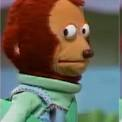